In [9]:
# IMPORTS
import cv2
import numpy as np
import utils
import matplotlib.pyplot as plt

In [10]:
def show_images(images, titles=None):
    """
    This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    @param images :array of images to be shown
    @param titles:titles corresponding to images

    @return None
    """
    #
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None:
        titles = ['(%d)' % i for i in range(1, n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image, title in zip(images, titles):
        a = fig.add_subplot(1, n_ims, n)
        if image.ndim == 2:
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()
    return None

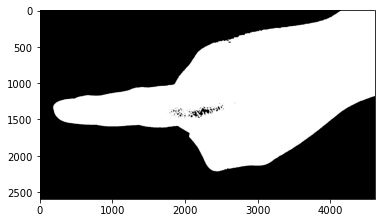

error: OpenCV(4.7.0) :-1: error: (-5:Bad argument) in function 'findContours'
> Overload resolution failed:
>  - findContours() missing required argument 'mode' (pos 2)
>  - findContours() missing required argument 'mode' (pos 2)


In [37]:
# CORNER DETECTION 
filename = '../prepocessing_output/binary_1_men (1).JPG'

# read the image
img = cv2.imread(filename)
plt.imshow(img), plt.show()

# img = cv2.dilate(img, (50, 20), img)
# plt.imshow(img), plt.show()

contours, _ = cv2.findContours(img)
length = len(contours)
for i in range(len(contours)):
    cv2.drawContours(img, contours, i, (0,255,0), 2, cv2.LINE_8)
    plt.imshow(img), plt.show()

# convert image to gray scale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# detect corners with the goodFeaturesToTrack function.
corners = cv2.goodFeaturesToTrack(gray, 0, 0.8, 10)
corners = np.int0(corners)
  
# we iterate through each corner, 
# making a circle at each point that we think is a corner.
for corner in corners:
    x, y = corner.ravel()
    print(x, y)
    centre = (x, y)
    color = (255, 0, 0)
    radius = 20
    thickness = 10

    img = cv2.circle(img, centre, radius, color, thickness)
  
plt.imshow(img), plt.show()

In [ ]:
# HOG